<a href="https://colab.research.google.com/github/maytanti/mushroom-cap-classifier/blob/main/Mushroom_Cap_Classification_Using_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Cap Classification Using Decision Trees

Link to the dataset can be found [here](https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing).

Import all the libraries required.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

Build a classification model that predicts the edibility of mushrooms (class variable in the dataset) from mushrooms.csv file. 
Here is a description of the attributes


Attribute description:
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
23. class: p = poisonous, e=edible


1. Build a classification tree. Random_state =2020. Training partition 0.7. stratify = y, max_depth = 6, use Entropy

A. Read the dataset, explore it and determine what is the dependent variable.

B. Store the feature and target variable.

C. Convert all categorical variables into dummy variables.

D. Partition the data into training and test sets (70/30).

E. Fit the training data to a classification tree.

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('mushrooms.csv')
print(df.head())
# The target variable is 'class'


X_old = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
y = df['class']

X = pd.get_dummies(X_old, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

dt = DecisionTreeClassifier(criterion='entropy', max_depth=6)
dt.fit(X_train, y_train)


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color stalk-shape stalk-root  \
0            c         n          k           e          e   
1            c         b          k           e          c   
2            c         b          n           e          c   
3            c         n          n           e          e   
4            w         b          k           t          e   

  stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring  \
0                        s                        s                      w   
1                        s            

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

2. Print the confusion matrix. 
Also visualize the confusion matrix using plot_confusion_matrix from sklearn.metrics.



[[1263    0]
 [   3 1172]]
Accuracy = 0.9987694831829368


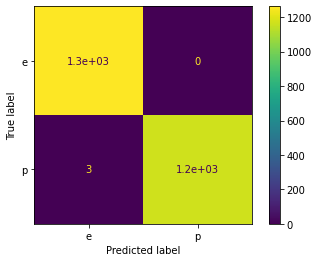

In [ ]:
y_pred = dt.predict(X_test)

cf = metrics.confusion_matrix(y_test, y_pred)
print(cf)

metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

3. Print the accuracy on the training partition.


In [ ]:
y_pred2 = dt.predict(X_train)

print('Accuracy =', metrics.accuracy_score(y_train, y_pred2))

Accuracy = 1.0


4. Print the accuracy on the test partition.


In [ ]:
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.9987694831829368


5. Show the classification tree and save it.


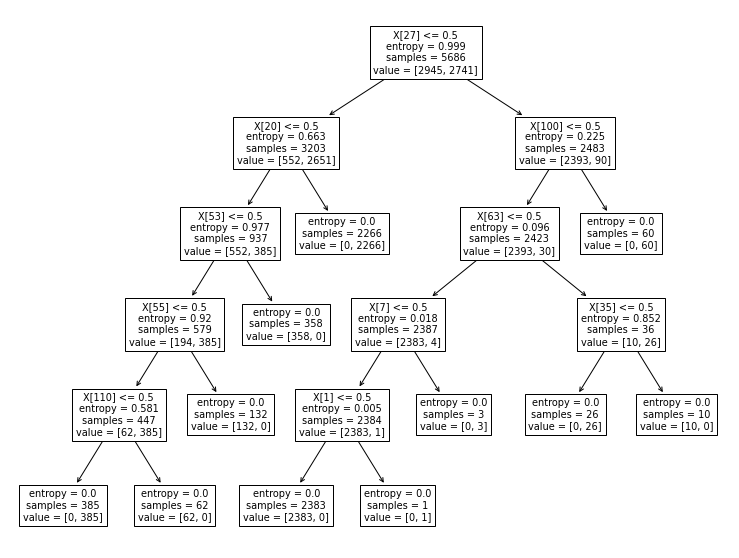

In [ ]:
plt.figure(figsize=(13,10))
decisionTree = tree.plot_tree(dt)
plt.savefig('DT.png')
plt.show()

6. Find and print the top three most important features in your decision tree  for determining toxicity.

In [ ]:
imp = pd.DataFrame(zip(X_train.columns, dt.feature_importances_), columns=['Feature', 'Weight'])
imp = imp.sort_values(by='Weight', ascending=False)
print(imp)

#1. odor_n
#2. bruises_f
#3. stalk-root_c

                 Feature    Weight
27                odor_n  0.527899
20             bruises_f  0.212695
53          stalk-root_c  0.067373
100  spore-print-color_r  0.057232
55          stalk-root_r  0.048067
..                   ...       ...
37          gill-color_b  0.000000
36           gill-size_n  0.000000
34        gill-spacing_w  0.000000
33        gill-spacing_c  0.000000
116            habitat_w  0.000000

[117 rows x 2 columns]


7. Classify the following mushroom.

class
 : **?**

cap-shape
: **x**

cap-surface
: **s**

cap-color
: **n**

bruises
: **t**

odor
: **y**

gill-attachment
: **f**

gill-spacing
: **c**

gill-size
: **n**

gill-color
: **k**

stalk-shape
: **e**

stalk-root
: **e**

stalk-surface-above-ring
: **s**

stalk-surface-below-ring
: **s**

stalk-color-above-ring
: **w**

stalk-color-below-ring
: **w**

veil-type
: **p**

veil-color
: **w**

ring-number
: **o**

ring-type
: **p**

spore-print-color
: **r**

population
: **s**

habitat
: **u**



In [ ]:
df_new = df[:]    #Copy original dataframe
x_new = ['?', 'x', 's', 'n', 't', 'y', 'f', 'c', 'n', 'k', 'e', 'e', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'r', 's', 'u']    #Make a list of the features of the mushroom
x_new = pd.Series(x_new, index = df_new.columns)
df_new = df_new.append(x_new, ignore_index=True)  #Append this data to last row of df
# print(df_new)

X1 = df_new[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

X_new = pd.get_dummies(X1, columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])             #Recreate the dummies

X_new_test = X_new.iloc[-1,:]   #Take only last row of df, which contains the mushroom data
X_new_test = X_new_test.values
X_new_test = [X_new_test]   #Format data  for prediction

y_new = dt.predict(X_new_test)
print("Outcome:", y_new)

Outcome: ['p']
